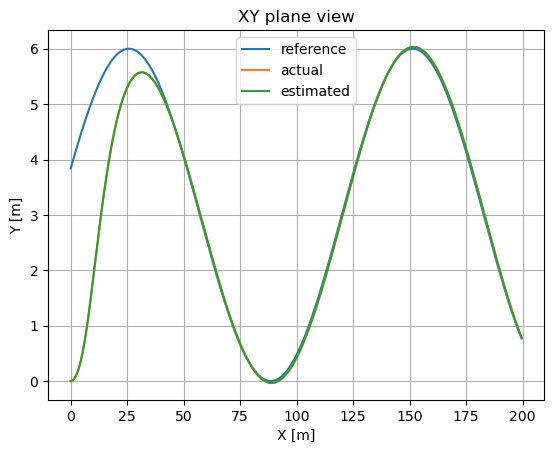

In [13]:
import numpy as np
from matplotlib import pyplot as plt
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

filename = "simRes.txt"

with open(filename) as f:
    lines = [i[:-1] for i in f.readlines() if i!=""]

psi = np.zeros(len(lines))
rpsi = np.zeros(len(lines))
estpsi = np.zeros(len(lines))
Y = np.zeros(len(lines))
rY = np.zeros(len(lines))
estY = np.zeros(len(lines))
time = np.zeros(len(lines))
counter = 0
for line in lines:
    psi[counter] = line.split(",")[0]
    rpsi[counter] = line.split(",")[1]
    estpsi[counter] = line.split(",")[2]
    Y[counter] = line.split(",")[3]
    rY[counter] = line.split(",")[4]
    estY[counter] = line.split(",")[5]
    time[counter] = line.split(",")[6]
    counter+=1
space = time * 20
fig,ax = plt.subplots()
plt.title("XY plane view")
plt.plot(space,rY, label = "reference")
plt.plot(space,Y, label = "actual")
plt.plot(space,estY, label = "estimated")
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
plt.grid()
plt.legend()
plt.show(fig)


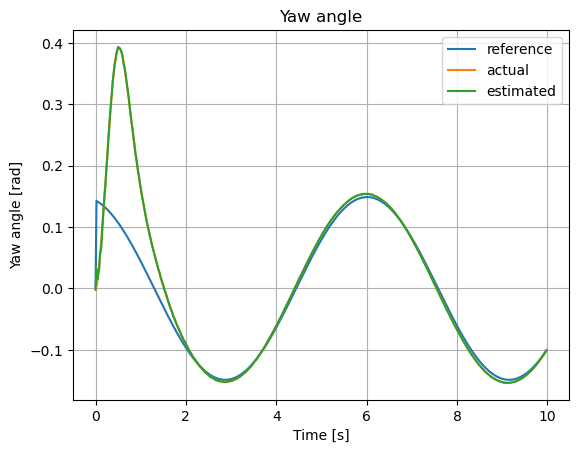

In [14]:
fig,ax = plt.subplots()
plt.title("Yaw angle")
plt.plot(time,rpsi, label = "reference")
plt.plot(time,psi, label = "actual")
plt.plot(time,estpsi, label = "estimated")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Yaw angle [rad]")
plt.grid()
plt.legend()
plt.show(fig)


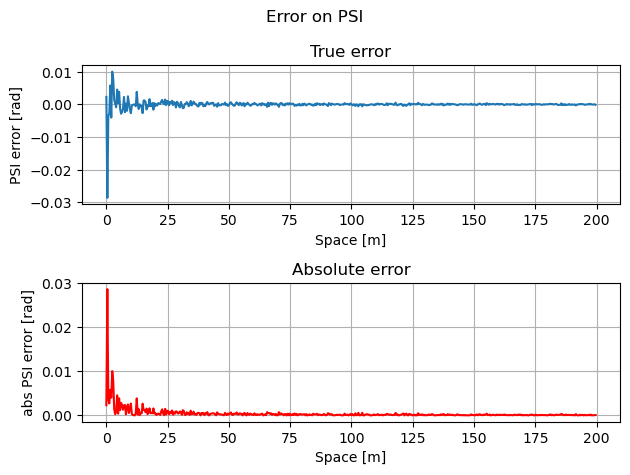

In [15]:
from cProfile import label


psierr = psi-estpsi
psierrabs = np.copy(psierr)
psierrabs[psierrabs<0] = -psierrabs[psierrabs<0]
fig,ax = plt.subplots(2,1)
fig.suptitle("Error on PSI")
ax[0].set_title("True error")
ax[0].plot(space, psierr, label = "True error")
ax[0].set_xlabel("Space [m]")
ax[0].set_ylabel("PSI error [rad]")
ax[0].grid()

ax[1].set_title("Absolute error")
ax[1].plot(space, psierrabs, color = "r" , label="Absolute error")
ax[1].set_xlabel("Space [m]")
ax[1].set_ylabel("abs PSI error [rad]")
ax[1].grid()

fig.tight_layout()
plt.show(fig)